In [236]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# TODO

- [ ] Establish features like on here: https://github.com/prathameshtari/Predicting-Football-Match-Outcome-using-Machine-Learning/blob/master/Predicting%20Football%20Match%20Outcome%20using%20Machine%20Learning/Predicting%20Football%20Match%20Outcome%20using%20Machine%20Learning.ipynb
- [ ] Try SVM with new features
- [ ] Ensamble the results of the methods into a weighted method

## Load data

In [237]:
df = pd.read_csv('https://raw.githubusercontent.com/shabir-dhillon/GCW_0036/main/Group%20Coursework%20Brief-20221106/Data_Files/epl-full-training.csv')

In [238]:
print(df.shape)
df.head()

(7736, 23)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,17/08/2002,Blackburn,Sunderland,0,0,D,0,0,D,...,5,3,14,11,9,1,1,2,0,0
1,E0,17/08/2002,Charlton,Chelsea,2,3,A,2,1,H,...,5,12,10,12,3,6,0,3,1,0
2,E0,17/08/2002,Everton,Tottenham,2,2,D,1,0,H,...,9,5,18,4,10,5,1,1,0,0
3,E0,17/08/2002,Fulham,Bolton,4,1,H,3,1,H,...,6,1,16,12,7,4,1,2,0,0
4,E0,17/08/2002,Leeds,Man City,3,0,H,2,0,H,...,8,10,13,13,2,7,1,1,0,0


Convert time to datetime format. Add separate date features and drop unconverted Date.

In [239]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year - 2000
df = df.drop(columns=['Date'])

/home/sree/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sree/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sree/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/08/2002' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/sree/.local/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/08/2002' in DD/MM/YYYY format. Provide form

Use data from only *n* past years.

In [240]:
# n = 5
# df = df[df['Year'] > 22 - n]

Create a 'trivial' df.

In [241]:
df_trivial = df[['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTR']]


In [242]:
df_trivial.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTR
0,17,8,2,Blackburn,Sunderland,D
1,17,8,2,Charlton,Chelsea,A
2,17,8,2,Everton,Tottenham,D
3,17,8,2,Fulham,Bolton,H
4,17,8,2,Leeds,Man City,H


In [243]:
df.head()

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,Day,Month,Year
0,E0,Blackburn,Sunderland,0,0,D,0,0,D,D Elleray,...,11,9,1,1,2,0,0,17,8,2
1,E0,Charlton,Chelsea,2,3,A,2,1,H,G Barber,...,12,3,6,0,3,1,0,17,8,2
2,E0,Everton,Tottenham,2,2,D,1,0,H,N Barry,...,4,10,5,1,1,0,0,17,8,2
3,E0,Fulham,Bolton,4,1,H,3,1,H,A Wiley,...,12,7,4,1,2,0,0,17,8,2
4,E0,Leeds,Man City,3,0,H,2,0,H,G Poll,...,13,2,7,1,1,0,0,17,8,2


#### Plot histogram of wins/loses/draws

<AxesSubplot:>

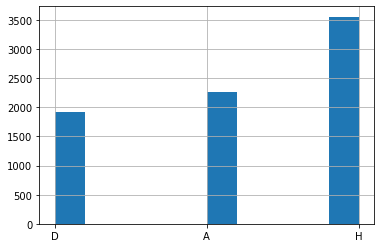

In [244]:
df['FTR'].hist()

## Create team average statistics

Dropping the referee, we don't need the guy....

In [245]:
df = df.drop(columns=['Referee'])

Calculate the averages, store them in other DFs.

## Classification

**Select df to be used for model training and testing.**

In [246]:
# df_for_models = df_trivial
df_for_models = df

In [247]:
df_for_models

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AF,HC,AC,HY,AY,HR,AR,Day,Month,Year
0,E0,Blackburn,Sunderland,0,0,D,0,0,D,15,...,11,9,1,1,2,0,0,17,8,2
1,E0,Charlton,Chelsea,2,3,A,2,1,H,5,...,12,3,6,0,3,1,0,17,8,2
2,E0,Everton,Tottenham,2,2,D,1,0,H,13,...,4,10,5,1,1,0,0,17,8,2
3,E0,Fulham,Bolton,4,1,H,3,1,H,13,...,12,7,4,1,2,0,0,17,8,2
4,E0,Leeds,Man City,3,0,H,2,0,H,13,...,13,2,7,1,1,0,0,17,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,E0,Chelsea,Arsenal,0,1,A,0,0,D,5,...,13,4,6,5,2,0,0,11,6,22
7732,E0,Aston Villa,Man United,3,1,H,2,1,H,6,...,12,3,5,3,3,0,0,11,6,22
7733,E0,Southampton,Newcastle,1,4,A,0,1,A,16,...,10,8,2,1,0,0,0,11,6,22
7734,E0,West Ham,Crystal Palace,1,2,A,1,1,D,5,...,7,2,5,1,1,0,0,11,6,22


### Categorical + Label Encodings

Encode team names and FTR.

In [248]:
oe = OrdinalEncoder()
le = LabelEncoder()

df_for_models[['HomeTeamCode', 'AwayTeamCode']] = oe.fit_transform(df_for_models[['HomeTeam', 'AwayTeam']])
df_for_models['FTRCode'] = le.fit_transform(df_for_models['FTR'])

Label mapping

In [249]:
le.classes_, le.transform(le.classes_)

(array(['A', 'D', 'H'], dtype=object), array([0, 1, 2]))

Drop unused columns with not converted date, unencoded team names and unencoded FTR.

In [250]:
df_for_models = df_for_models.drop(columns=['HomeTeam', 'AwayTeam', 'FTR'])
#removing dates as well:
df_for_models = df_for_models.drop(columns=['Day', 'Month','Year'])
#removing other match stats
df_for_models = df_for_models.drop(columns=["Div", 'FTHG', 'HTHG', 'FTAG', 'HTAG','HTR'])


In [251]:
print(df_for_models.columns)
df_for_models.head()

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'HomeTeamCode', 'AwayTeamCode', 'FTRCode'],
      dtype='object')


,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeTeamCode,AwayTeamCode,FTRCode
0,15,7,5,3,14,11,9,1,1,2,0,0,3.0,34.0,1
1,5,21,5,12,10,12,3,6,0,3,1,0,11.0,12.0,0
2,13,10,9,5,18,4,10,5,1,1,0,0,15.0,36.0,1
3,13,3,6,1,16,12,7,4,1,2,0,0,16.0,5.0,2
4,13,18,8,10,13,13,2,7,1,1,0,0,19.0,22.0,2


### Data Split & Normalization

Create X, Y numpy objects.

In [252]:
X = df_for_models.drop(columns='FTRCode').to_numpy()
Y = df_for_models['FTRCode'].to_numpy()

Normalize values in X.

In [253]:
from sklearn.preprocessing import MinMaxScaler #fixed import

ss = MinMaxScaler()
#ss = StandardScaler()
X = ss.fit_transform(X)
X = ss.fit_transform(X)

Perform the data split.

In [254]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [255]:
df_for_models.head()

print(x_train[0])

[0.09302326 0.22580645 0.08333333 0.2        0.72727273 0.59259259
 0.2        0.15789474 0.42857143 0.55555556 0.         0.
 0.         0.53658537]


### SVM

In [256]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [257]:
clf = [MultinomialNB(alpha=200), SVC(kernel = 'linear', C=5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):
    clf[i].fit(x_train,y_train)
    # clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], x_train, y_train, cv=10)
    # scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    # print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    print(labels[i], " : ", scores.mean())
    
    mean_scores.append(scores.mean())  
    # mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.4562050702929352
SVM  :  0.5672216384083316
Log regres  :  0.5662515488495381


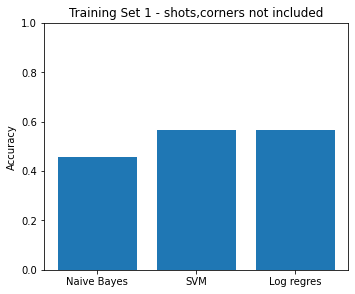

In [258]:


fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(3));
ax.set_xticks(range(3));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

# ax2 = fig.add_subplot(2,2,2);
# ax2.bar(range(0,3),mean_scores_2,align='center');
# ax2.set_xticks(range(4))
# ax2.set_ylabel("Accuracy")
# ax2.set_ylim(0,1);
# ax2.set_title("Training Set 2 - shots,corners included")
# ax2.set_xticklabels(labels);

